In [1]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import pandas as pd

In [2]:
TRAIN_DIR = 'D:/Kuliah/Tugas Akhir/Gambar/train'
TEST_DIR = 'D:/Kuliah/Tugas Akhir/Gambar/test'
IMG_SIZE = 500
LR = 1e-3

In [3]:
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()
os.chdir('D:\Kuliah\Tugas Akhir\Referensi\Fix\Model')
current_path()

Current working directory before
C:\Users\HP

Current working directory before
D:\Kuliah\Tugas Akhir\Referensi\Fix\Model



In [4]:
'''Setting up the model which will help with tensorflow models'''
MODEL_NAME = 'IntegralVSPeluang-{}-{}.model'.format(LR, '6conv-basic')

In [5]:
def func():
    return 0.5

In [6]:
'''Labelling the dataset'''
def label_img(img):
    word_label = img.split('.')[0]
    # DIY One hot encoder
    if word_label == 'Integral': return ['Integral']
    elif word_label == 'Peluang': return ['Peluang']

In [7]:
'''Creating the training data'''
def create_train_data():
    # Creating an empty list where we should store the training data
    # after a little preprocessing of the data
    training_data = []
  
    # tqdm is only used for interactive loading
    # loading the training data
    for img in tqdm(os.listdir(TRAIN_DIR)):
  
        # labeling the images
        label = label_img(img)
  
        path = os.path.join(TRAIN_DIR, img)
  
        # loading the image from the path and then converting them into
        # grayscale for easier covnet prob
        img = cv2.imread(path)
  
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        ## grayscale for easier covnet prob
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # final step-forming the training data list with numpy array of the images
        training_data.append([img, label])
  
    # shuffling of the training data to preserve the random state of our data
    shuffle(training_data, func)
  
    # saving our trained data for further uses if required
    np.save('train_data.npy', training_data)
    return training_data

In [8]:
'''Processing the given test data'''
# Almost same as processing the training data but
# we dont have to label it.
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
          
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [9]:
'''Running the training and the testing in the dataset for our model'''
train_data = create_train_data()
test_data = process_test_data()

100%|███████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 257.17it/s]
C:\Users\HP\AppData\Local\Temp\ipykernel_19292\1095906699.py:30: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  shuffle(training_data, func)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 256.72it/s]


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
'''Setting up the features and labels'''
# X-Features & Y-Labels
labels = LabelEncoder()
X = np.array([i[0] for i in train_data])/255
Y = [i[1] for i in train_data]
labels.fit(Y)
Y = labels.transform(Y)
X.shape

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(160, 500, 500)

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(X,Y, test_size=0.2, random_state=123)

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 100s 100s/step - loss: 0.7065 - accuracy: 0.5000 - val_loss: 48.4477 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 41s 41s/step - loss: 50.1927 - accuracy: 0.5000 - val_loss: 14.9074 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 46s 46s/step - loss: 15.4483 - accuracy: 0.5000 - val_loss: 12.2558 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 80s 80s/step - loss: 11.1603 - accuracy: 0.5000 - val_loss: 11.7369 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 44s 44s/step - loss: 10.6727 - accuracy: 0.5000 - val_loss: 1.2018 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 47s 47s/step - loss: 1.2105 - accuracy: 0.5000 - val_loss: 1.5447 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 52s 52s/step - loss: 1.5567 - accuracy: 0.5000 - val_loss: 4.0178 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=

In [16]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 1s 859ms/step
Testing selesai
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.67      1.00      0.80        16

    accuracy                           0.75        32
   macro avg       0.83      0.75      0.73        32
weighted avg       0.83      0.75      0.73        32



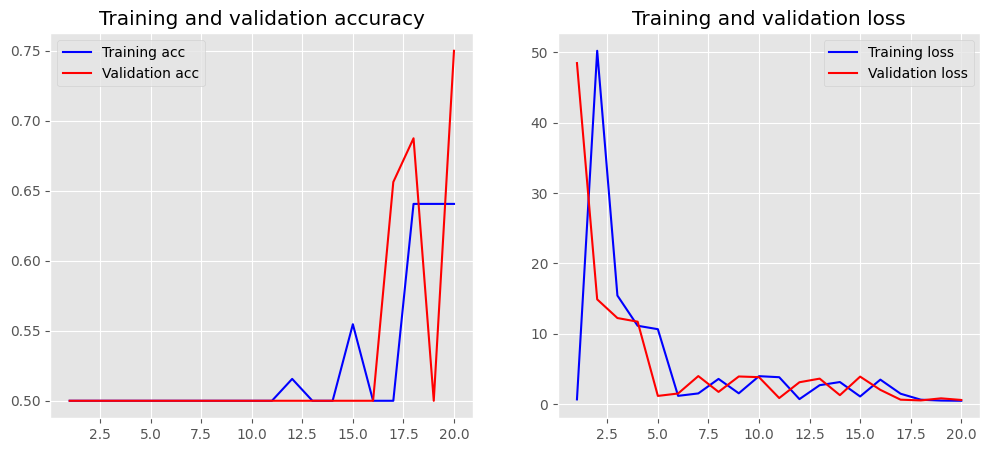

In [17]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [18]:
model.save('1CK6CS.h5')
print("Model has created!")

Model has created!


In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 106s 106s/step - loss: 0.7012 - accuracy: 0.5000 - val_loss: 3.7223 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 106s 106s/step - loss: 3.8646 - accuracy: 0.5000 - val_loss: 1.0588 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 118s 118s/step - loss: 0.9891 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 116s 116s/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 2.0167 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 117s 117s/step - loss: 1.8483 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 115s 115s/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 85s 85s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
1/1 

In [22]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 2s 2s/step
Testing selesai
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.50      1.00      0.67        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

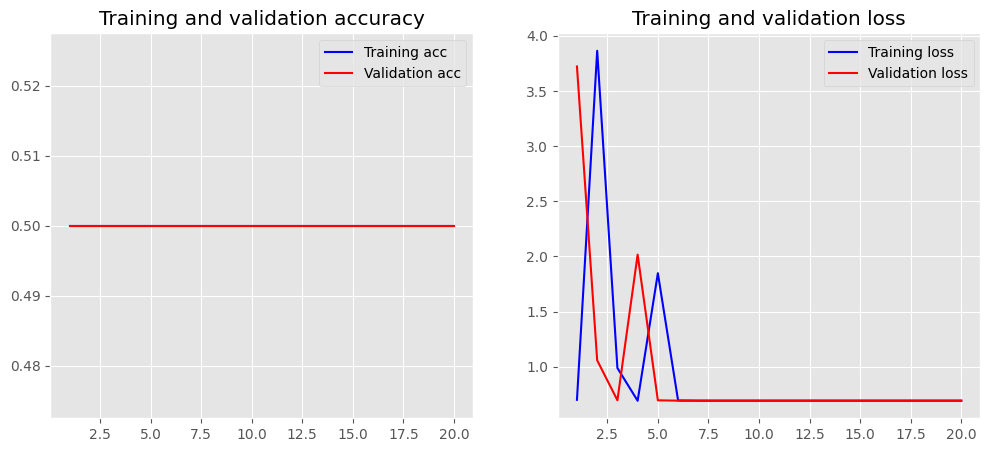

In [23]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [25]:
model.save('2CK6CS.h5')
print("Model has created!")

Model has created!


In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 94s 94s/step - loss: 0.6934 - accuracy: 0.5234 - val_loss: 3.7132 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 123s 123s/step - loss: 3.4117 - accuracy: 0.5000 - val_loss: 0.8269 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 124s 124s/step - loss: 0.8481 - accuracy: 0.5000 - val_loss: 1.0250 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 112s 112s/step - loss: 0.9627 - accuracy: 0.5000 - val_loss: 0.7204 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 107s 107s/step - loss: 0.7058 - accuracy: 0.5000 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 128s 128s/step - loss: 0.7074 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 114s 114s/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 8/20
1/1 

In [29]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 2s 2s/step
Testing selesai
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.78      0.88      0.82        16

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



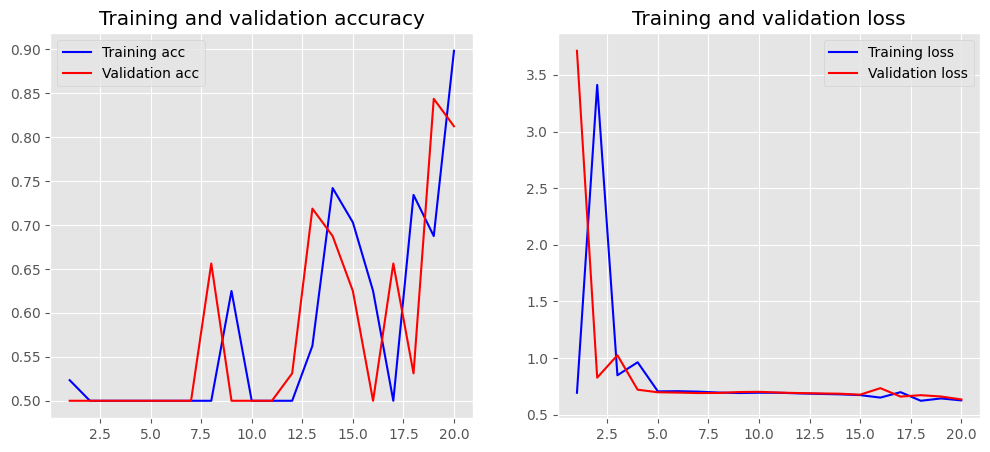

In [30]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [31]:
model.save('3CK6CS.h5')
print("Model has created!")

Model has created!


In [18]:
result = model.evaluate(test_images, test_labels)

1/1 [==============================] - 2s 2s/step - loss: 0.6889 - accuracy: 0.5000


In [19]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.6889369487762451
accuracy : 0.5


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 495, 495, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 247, 247, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 242, 242, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 121, 121, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      36896     
                                                                 
 flatten (Flatten)           (None, 430592)            0

4/4 [==============================] - 9s 2s/step


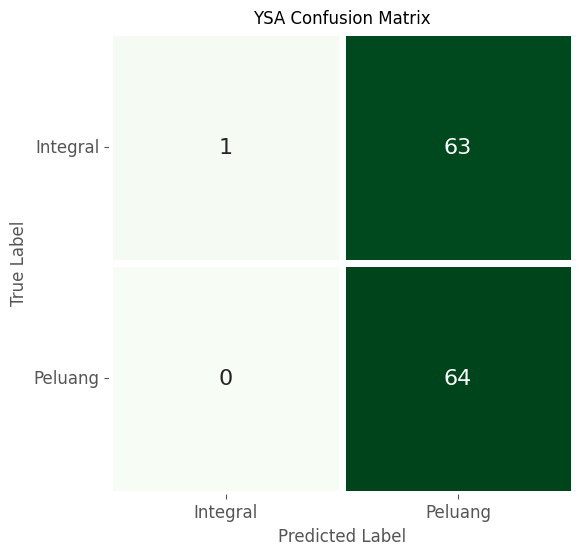

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(train_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(train_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Integral","Peluang"], index= ["Integral","Peluang"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 3s 3s/step


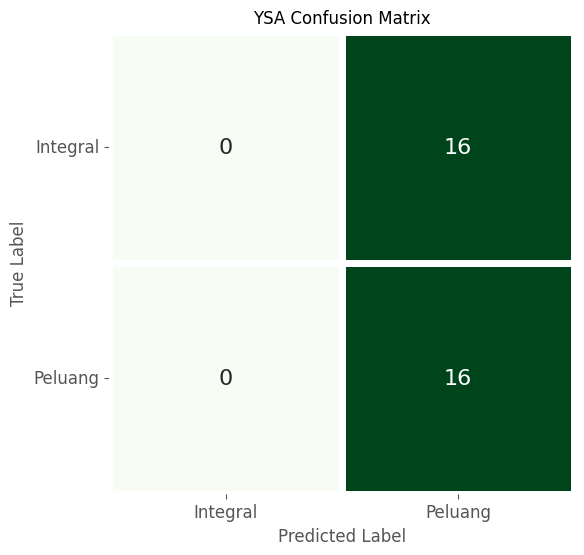

In [23]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels, toClass(y_pred))

df1 = pd.DataFrame(columns=["Integral","Peluang"], index= ["Integral","Peluang"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [24]:
model.save('6CK.h5')
print("Model has created!")

Model has created!
